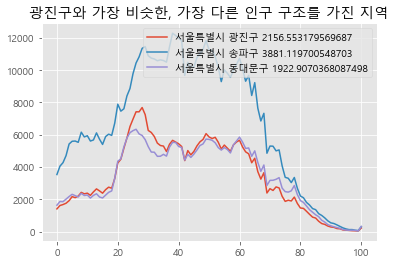

In [61]:
# -*- coding:utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_excel("population.xlsx", engine='openpyxl', thousands=',')
name = df.iloc[:,1] # '행정구역' dataframe
target_index='서울특별시 광진구 '
target = (df[df['행정기관'] == target_index]).iloc[:,4:] # '서울특별시 광진구 '의 나이별 인구수 데이터

data = df.iloc[1:,4:]# 모든 지역의 나이별 인구수 데이터

a = np.array(target, dtype=np.int64) # '서울특별시 광진구 '의 나이별 인구수 행렬
b = np.array(data, dtype=np.int64) # 모든 지역의 나이별 인구수 행렬

interval = b-a
times = (interval)**2
diff = [] # 지역별로 (연령별 차이)^2의 합을 저장한 리스트
for i in range(25):
    s = 0
    for j in range(101):
        s += times[i,j]
    diff.append(s)

max = 0 # 최대 차이 데이터
min = 2**64  # 최소 차이 데이터
for i in range(len(diff)): # 최대, 최소 차이 찾기
    if diff[i]>max :
        max = diff[i]
    elif diff[i]<min and i!=4:
        min = diff[i]
max_index = diff.index(max)
min_index = diff.index(min)
max_name = name[max_index+1]
min_name = name[min_index+1]

plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic') # 한글사용위해 폰트지정
plt.title('광진구와 가장 비슷한, 가장 다른 인구 구조를 가진 지역')
plt.plot(np.linspace(0,100,101),a.transpose(), label='서울특별시 광진구 '+str(np.std(a)))
plt.plot(np.linspace(0,100,101),b[max_index], label=max_name+str(np.std(b[max_index]))) # 표편구하기 : np.std()
plt.plot(np.linspace(0,100,101), b[min_index], label=min_name+str(np.std(b[min_index])))
plt.legend()
plt.show()